<a href="https://colab.research.google.com/github/markaljm/Track/blob/master/Self_Driving_Car_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [356]:
!git clone https://github.com/markaljm/Track.git

fatal: destination path 'Track' already exists and is not an empty directory.


In [357]:
!ls Track

driving_log.csv  IMG


In [358]:
!!pip3 install imgaug

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Requirement already satisfied: imgaug in /usr/local/lib/python3.7/dist-packages (0.4.0)',
 'Requirement already satisfied: numpy>=1.15 in /usr/local/lib/python3.7/dist-packages (from imgaug) (1.21.6)',
 'Requirement already satisfied: opencv-python in /usr/local/lib/python3.7/dist-packages (from imgaug) (4.6.0.66)',
 'Requirement already satisfied: Pillow in /usr/local/lib/python3.7/dist-packages (from imgaug) (7.1.2)',
 'Requirement already satisfied: scikit-image>=0.14.2 in /usr/local/lib/python3.7/dist-packages (from imgaug) (0.18.3)',
 'Requirement already satisfied: six in /usr/local/lib/python3.7/dist-packages (from imgaug) (1.15.0)',
 'Requirement already satisfied: imageio in /usr/local/lib/python3.7/dist-packages (from imgaug) (2.9.0)',
 'Requirement already satisfied: Shapely in /usr/local/lib/python3.7/dist-packages (from imgaug) (1.8.2)',
 'Requirement already satisfied:

In [359]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [360]:
datadir='Track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


center  \
0  C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\center_2022_08_12_12_29_14_203.jpg   
1  C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\center_2022_08_12_12_29_14_305.jpg   
2  C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\center_2022_08_12_12_29_14_407.jpg   
3  C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\center_2022_08_12_12_29_14_508.jpg   
4  C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\center_2022_08_12_12_29_14_610.jpg   

                                                                                    left  \
0   C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\left_2022_08_12_12_29_14_203.jpg   
1   C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\left_2022_08_12_12_29_14_305.jpg   
2   C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\left_2022_08_12_12_29_14_407.jpg   
3   C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\left_2022_08_12_12_29_14_508.jpg   
4   C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\left_2022_08_12_12_29_14_610.jpg   

                                                                                    right  \
0   C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\right_2022_08_12_12_29_14_203.jpg   
1   C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\right_2022_08_12_12_29_14_305.jpg   
2   C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\right_2022_08_12_12_29_14_407.jpg   
3   C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\right_2022_08_12_12_29_14_508.jpg   
4   C:\Users\NEM_User\Desktop\Self Driving\Training\IMG\right_2022_08_12_12_29_14_610.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.000079  
1  0.0       0.0       0.0      0.000081  
2  0.0       0.0       0.0      0.000080  
3  0.0       0.0       0.0      0.000079  
4  0.0       0.0       0.0      0.000079

In [361]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2022_08_12_12_29_14_203.jpg  left_2022_08_12_12_29_14_203.jpg   
1  center_2022_08_12_12_29_14_305.jpg  left_2022_08_12_12_29_14_305.jpg   
2  center_2022_08_12_12_29_14_407.jpg  left_2022_08_12_12_29_14_407.jpg   
3  center_2022_08_12_12_29_14_508.jpg  left_2022_08_12_12_29_14_508.jpg   
4  center_2022_08_12_12_29_14_610.jpg  left_2022_08_12_12_29_14_610.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2022_08_12_12_29_14_203.jpg  0.0       0.0       0.0      0.000079  
1  right_2022_08_12_12_29_14_305.jpg  0.0       0.0       0.0      0.000081  
2  right_2022_08_12_12_29_14_407.jpg  0.0       0.0       0.0      0.000080  
3  right_2022_08_12_12_29_14_508.jpg  0.0       0.0       0.0      0.000079  
4  right_2022_08_12_12_29_14_610.jpg  0.0       0.0       0.0      0.000079

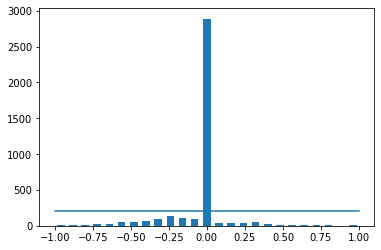

In [362]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 3804
removed: 2690
remaining: 1114


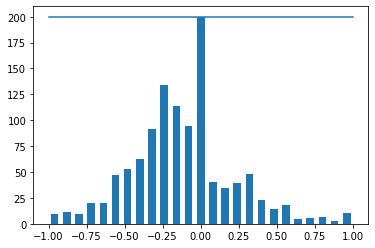

In [363]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))
 
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))


In [364]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
 
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2022_08_12_12_29_17_079.jpg
left        left_2022_08_12_12_29_17_079.jpg  
right       right_2022_08_12_12_29_17_079.jpg 
steering   -0.298931                          
throttle    0.810523                          
reverse     0.0                               
speed       1.382139                          
Name: 28, dtype: object


In [365]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 891
Valid Samples: 223


Text(0.5, 1.0, 'Validation set')

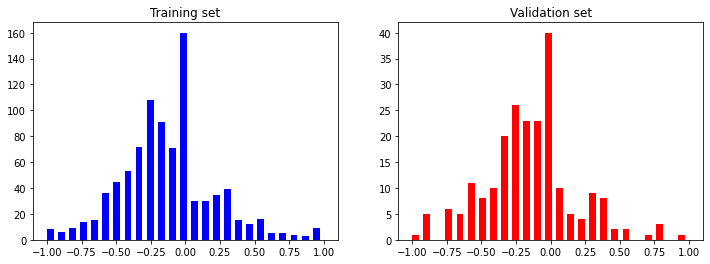

In [366]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [367]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

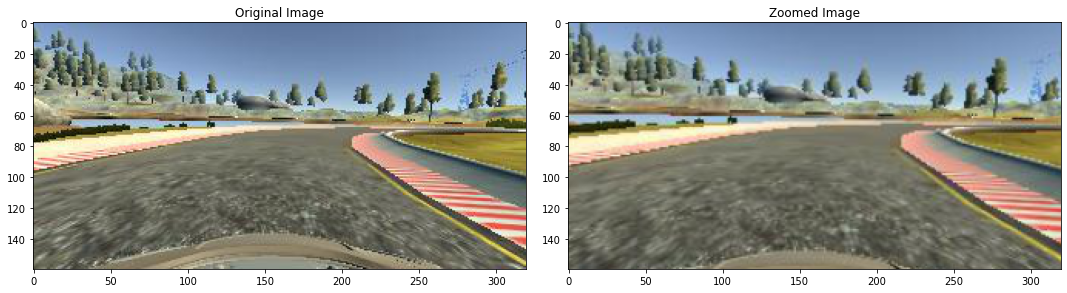

In [368]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [369]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

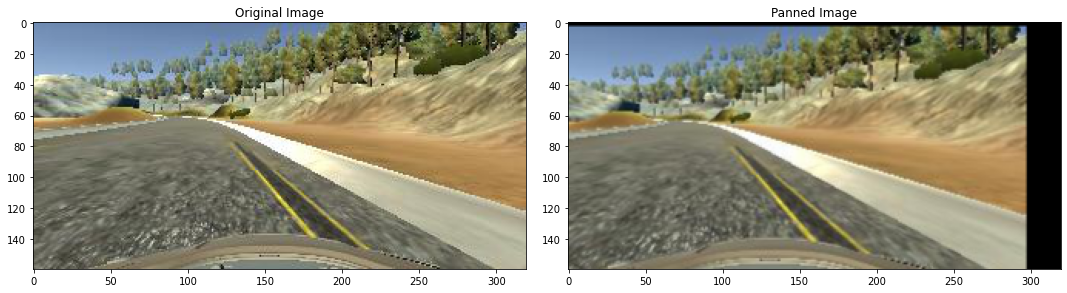

In [370]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [371]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Brightness altered image ')

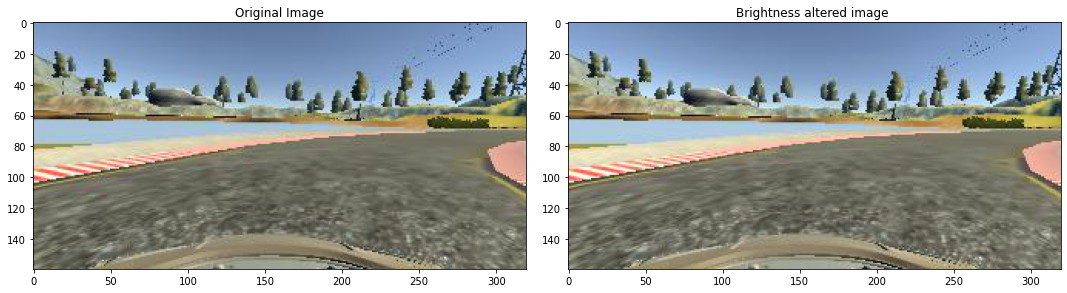

In [372]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [373]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.04311087')

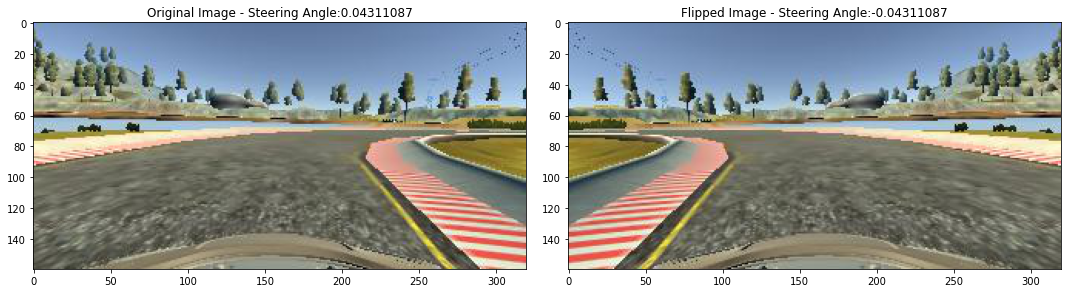

In [374]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]
 
 
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [375]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle

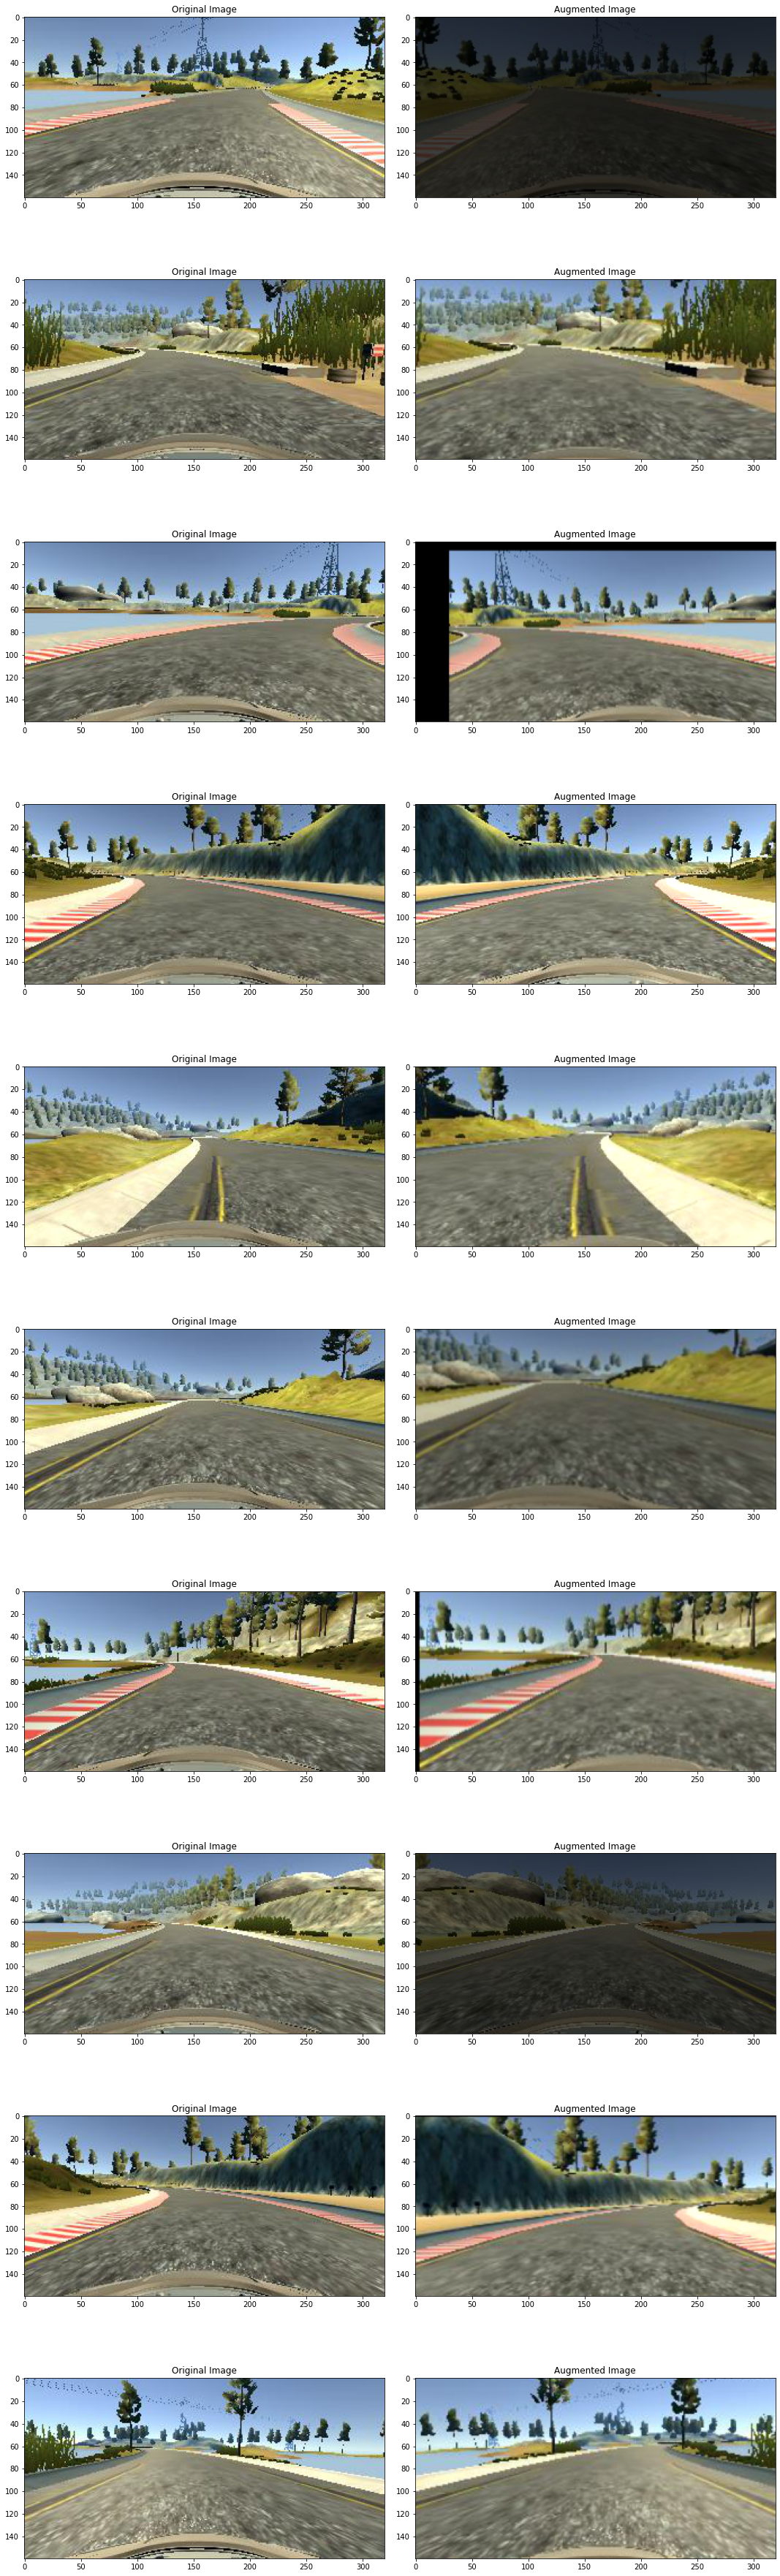

In [376]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [377]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

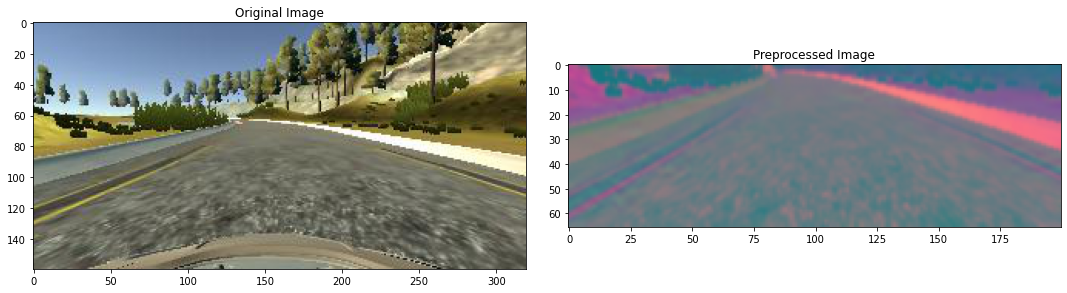

In [378]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [379]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))  

Text(0.5, 1.0, 'Validation Image')

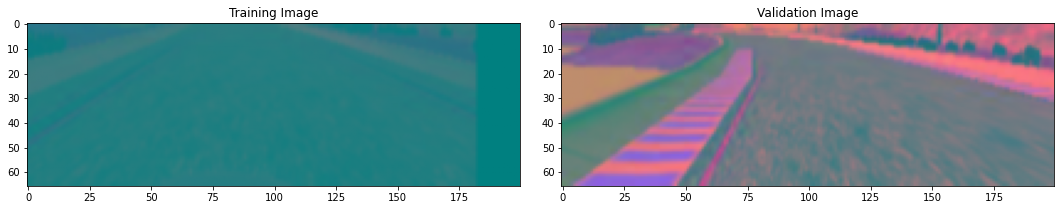

In [380]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [381]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24,(5,5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, (5,5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(48, (5,5), strides=(2, 2), activation='elu'))
  model.add(Conv2D(64, (3,3), activation='elu'))
  
  model.add(Conv2D(64, (3,3), activation='elu'))
  
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
 
  
  model.add(Dense(50, activation = 'elu'))
  
  
  model.add(Dense(10, activation = 'elu'))
  

  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model


In [382]:
model= nvidia_model()
print(model.summary())



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_27 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_28 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_29 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0         
                                                                 
 dense_20 (Dense)            (None, 100)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [383]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
300/300 [==============================] - 386s 1s/step - loss: 0.1740 - val_loss: 0.1218
Epoch 2/10
300/300 [==============================] - 356s 1s/step - loss: 0.1027 - val_loss: 0.0759
Epoch 3/10
300/300 [==============================] - 355s 1s/step - loss: 0.0832 - val_loss: 0.0697
Epoch 4/10
300/300 [==============================] - 358s 1s/step - loss: 0.0764 - val_loss: 0.0650
Epoch 5/10
300/300 [==============================] - 354s 1s/step - loss: 0.0669 - val_loss: 0.0698
Epoch 6/10
300/300 [==============================] - 350s 1s/step - loss: 0.0617 - val_loss: 0.0637
Epoch 7/10
300/300 [==============================] - 353s 1s/step - loss: 0.0584 - val_loss: 0.0601
Epoch 8/10
300/300 [==============================] - 350s 1s/step - loss: 0.0567 - val_loss: 0.0647
Epoch 9/10
300/300 [==============================] - 348s 1s/step - loss: 0.0516 - val_loss: 0.0690
Epoch 10/10
300/300 [==============================] - 353s 1s/step - loss: 0.0523 - val_lo

Text(0.5, 0, 'Epoch')

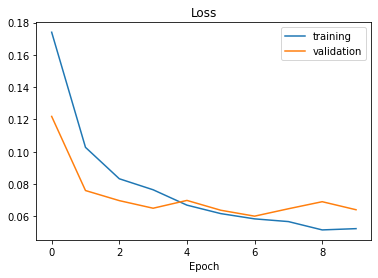

In [384]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [385]:
model.save('model.h5')

In [388]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>